графики - https://habr.com/ru/articles/468295/  

# Подгрузка библиотек

In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
sns.set_style('darkgrid')
#T_games_steam_appids.csv

# Подгрузка и форматирование датасетов

In [101]:
if False:
    main_data = pd.read_csv('T_games_with_timedelta (1).csv', header =  0, index_col= 'Unnamed: 0')
    main_data.drop(columns=['Unnamed: 0.1', 'id', 'client_id', 'category_id', 'good_id', 'monthly_income_amt', 'steam_popularity_score', 'dlc', 'name', 'time_end'], inplace=True)
    main_data.drop(columns=['good_cnt'], inplace=True)
    # удаляю ин стим, длс, из каминг сун и ордер дэй 2 (Женек), дропаю good_name, тк полностью совпадает с name (Ася)
    main_data.drop(columns=['in_steam', 'order_day_2','good_name' ], axis = 1, inplace = True)
    main_data.sort_values(by='appid', ascending=True)


In [102]:
if False:
    game_reviews_data = pd.read_csv('T_games_reviews.csv')
    game_reviews_data.sort_values(by='appid', ascending=True)
    main_data = main_data.merge(game_reviews_data, left_on='appid', right_on='appid', how='left')
    main_data.to_csv('dataset_3.csv', header=True)


In [103]:
main_data = pd.read_csv("dataset_3 (2).csv", index_col = 0, encoding='utf8')


In [104]:
main_data = main_data[ ~main_data['type'].isna()]
main_data['review_score_desc'] = main_data.review_score_desc.replace({'Overwhelmingly Positive': 5, 'Very Positive': 4, 'Positive': 3, 'Mostly Positive' : 2, 'Mixed' : 1, '2 user reviews' : 0, 'No user reviews': 0, '9 user reviews' : 0, '8 user reviews': 0, '7 user reviews' : 0, '4 user reviews' : 0, '1 user reviews': 0, '3 user reviews': 0, '6 user reviews': 0, '5 user reviews': 0, 'Negative' : -1,'Mostly Negative': -2, 'Very Negative' : -3, 'Overwhelmingly Negative' : - 4  })
main_data.drop(['diff_time','release_day' , 'time_start'], axis = 1, inplace= True)

In [105]:
main_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 240806 entries, 0 to 247553
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   order_day          240806 non-null  object 
 1   category_name      240806 non-null  object 
 2   good_price         240806 non-null  float64
 3   gender_cd          240806 non-null  object 
 4   age                240806 non-null  float64
 5   education_level    240806 non-null  object 
 6   city_nm            240806 non-null  object 
 7   appid              240806 non-null  float64
 8   type               240806 non-null  object 
 9   steam_name         240806 non-null  object 
 10  has_dlc            240806 non-null  object 
 11  is_coming_soon     240806 non-null  object 
 12  release_date       240298 non-null  object 
 13  pos_reviews        240806 non-null  float64
 14  neg_reviews        240806 non-null  float64
 15  total_reviews      240806 non-null  float64
 16  review_

In [106]:
df = main_data

In [107]:
df = df[df['category_name'] != 'Карты оплаты']

In [108]:
df = df[ ~df['type'].isna()]

In [109]:
df['release_date'] = df['release_date'].apply(lambda x: str(x).split('/')[-1])

In [110]:
df.head()

,order_day,category_name,good_price,gender_cd,age,education_level,city_nm,appid,type,steam_name,has_dlc,is_coming_soon,release_date,pos_reviews,neg_reviews,total_reviews,review_score_desc
0,22/05/2023,Скидки,299.00,M,28.0,UGR,Москва,230820.0,game,The Night of the Rabbit,True,False,2013,840.0,122.0,962.0,4
1,04/04/2022,Инди,33.49,M,35.0,UGR,Нижний Новгород,230820.0,game,The Night of the Rabbit,True,False,2013,840.0,122.0,962.0,4
2,19/08/2022,Скидки,29.90,M,25.0,GRD,Екатеринбург,230820.0,game,The Night of the Rabbit,True,False,2013,840.0,122.0,962.0,4
3,13/11/2022,Инди,29.90,M,34.0,GRD,Ростов-на-Дону,230820.0,game,The Night of the Rabbit,True,False,2013,840.0,122.0,962.0,4
4,16/05/2022,Приключения,29.90,M,25.0,UGR,Москва,230820.0,game,The Night of the Rabbit,True,False,2013,840.0,122.0,962.0,4


In [111]:
df['release_date'].value_counts()
df['order_day'] = df['order_day'].apply(lambda x: str(x).split('/')[-1])
df

,order_day,category_name,good_price,gender_cd,age,education_level,city_nm,appid,type,steam_name,has_dlc,is_coming_soon,release_date,pos_reviews,neg_reviews,total_reviews,review_score_desc
0,2023,Скидки,299.00,M,28.0,UGR,Москва,230820.0,game,The Night of the Rabbit,True,False,2013,840.0,122.0,962.0,4
1,2022,Инди,33.49,M,35.0,UGR,Нижний Новгород,230820.0,game,The Night of the Rabbit,True,False,2013,840.0,122.0,962.0,4
2,2022,Скидки,29.90,M,25.0,GRD,Екатеринбург,230820.0,game,The Night of the Rabbit,True,False,2013,840.0,122.0,962.0,4
3,2022,Инди,29.90,M,34.0,GRD,Ростов-на-Дону,230820.0,game,The Night of the Rabbit,True,False,2013,840.0,122.0,962.0,4
4,2022,Приключения,29.90,M,25.0,UGR,Москва,230820.0,game,The Night of the Rabbit,True,False,2013,840.0,122.0,962.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247549,2023,Симуляторы,125.00,F,29.0,GRD,Москва,2192770.0,game,Taddle Quest,False,True,2024,0.0,0.0,0.0,0
247550,2023,Симуляторы,125.00,F,29.0,GRD,Москва,2192770.0,game,Taddle Quest,False,True,2024,0.0,0.0,0.0,0
247551,2023,Симуляторы,125.00,F,29.0,GRD,Москва,2192770.0,game,Taddle Quest,False,True,2024,0.0,0.0,0.0,0
247552,2023,Симуляторы,125.00,F,29.0,GRD,Москва,2192770.0,game,Taddle Quest,False,True,2024,0.0,0.0,0.0,0


In [112]:
df = df[(df['education_level'] != 'PGR') & (df['education_level'] != 'ACD')]
main_data =  df
del df

## Смотрим характеристики

In [113]:
main_data.head()

,order_day,category_name,good_price,gender_cd,age,education_level,city_nm,appid,type,steam_name,has_dlc,is_coming_soon,release_date,pos_reviews,neg_reviews,total_reviews,review_score_desc
0,2023,Скидки,299.00,M,28.0,UGR,Москва,230820.0,game,The Night of the Rabbit,True,False,2013,840.0,122.0,962.0,4
1,2022,Инди,33.49,M,35.0,UGR,Нижний Новгород,230820.0,game,The Night of the Rabbit,True,False,2013,840.0,122.0,962.0,4
2,2022,Скидки,29.90,M,25.0,GRD,Екатеринбург,230820.0,game,The Night of the Rabbit,True,False,2013,840.0,122.0,962.0,4
3,2022,Инди,29.90,M,34.0,GRD,Ростов-на-Дону,230820.0,game,The Night of the Rabbit,True,False,2013,840.0,122.0,962.0,4
4,2022,Приключения,29.90,M,25.0,UGR,Москва,230820.0,game,The Night of the Rabbit,True,False,2013,840.0,122.0,962.0,4


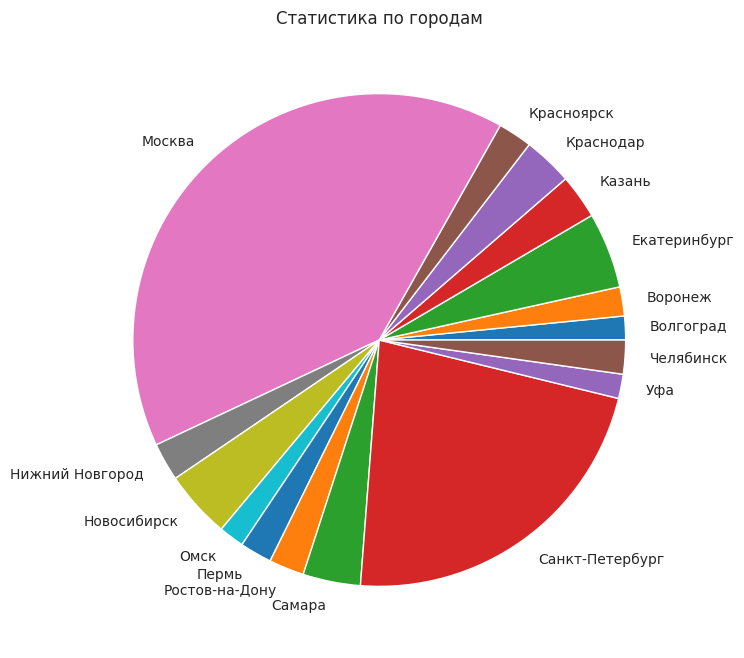

In [114]:
# Статистика по городам
data_edited = main_data.groupby('city_nm').size()

data_edited.plot(kind='pie', subplots=True, figsize=(8, 8))
plt.title("Статистика по городам")
plt.xticks(rotation=45)
plt.ylabel("")
plt.show()

In [115]:
main_data.describe()

,good_price,age,appid,pos_reviews,neg_reviews,total_reviews,review_score_desc
count,236622.000000,236622.000000,2.366220e+05,236622.000000,236622.000000,236622.000000,236622.000000
mean,763.765789,25.766645,1.424793e+06,6153.528700,631.221848,6784.750547,2.363681
std,965.848607,6.388523,6.240119e+05,31629.371456,3235.268700,34416.421556,1.932185
min,2.320000,15.000000,3.200000e+02,0.000000,0.000000,0.000000,-4.000000
25%,179.850000,21.000000,1.172470e+06,0.000000,0.000000,0.000000,0.000000
50%,599.000000,25.000000,1.205240e+06,119.000000,15.000000,134.000000,4.000000
75%,833.290000,31.000000,2.192770e+06,240.000000,70.000000,314.000000,4.000000
max,10656.300000,40.000000,2.673080e+06,277572.000000,45197.000000,296884.000000,5.000000


In [116]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 236622 entries, 0 to 247553
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   order_day          236622 non-null  object 
 1   category_name      236622 non-null  object 
 2   good_price         236622 non-null  float64
 3   gender_cd          236622 non-null  object 
 4   age                236622 non-null  float64
 5   education_level    236622 non-null  object 
 6   city_nm            236622 non-null  object 
 7   appid              236622 non-null  float64
 8   type               236622 non-null  object 
 9   steam_name         236622 non-null  object 
 10  has_dlc            236622 non-null  object 
 11  is_coming_soon     236622 non-null  object 
 12  release_date       236622 non-null  object 
 13  pos_reviews        236622 non-null  float64
 14  neg_reviews        236622 non-null  float64
 15  total_reviews      236622 non-null  float64
 16  review_

# Строим графики

### Heatmap

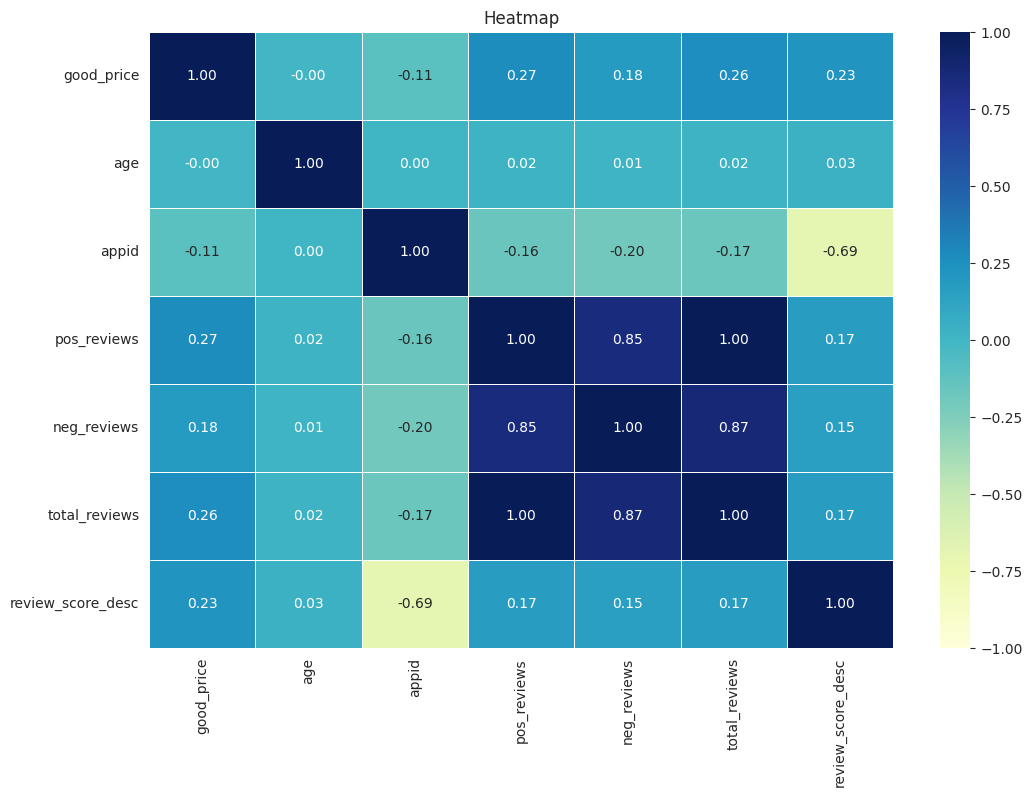

In [117]:
numeric_main_data = main_data.select_dtypes(include=['float64', 'int64'])

corr = numeric_main_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='YlGnBu', linewidths=0.5, vmin=-1)
plt.title('Heatmap')
plt.show()

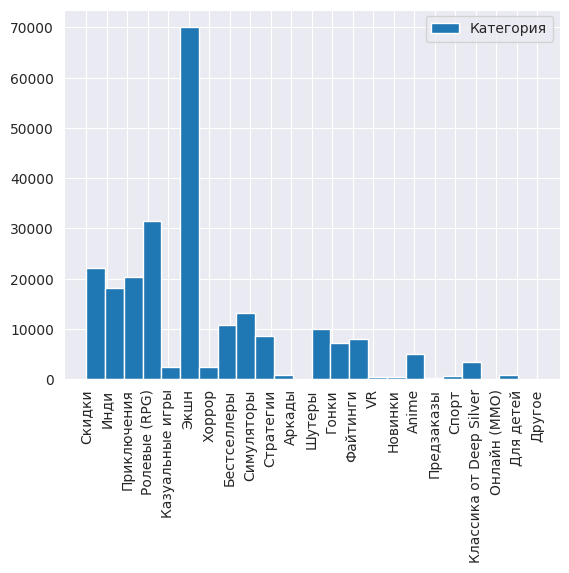

In [118]:
# Статистика по категориям
main_data.category_name.hist(bins =  24, label='Категория')
plt.xticks(rotation = 90)
plt.legend()
plt.show()

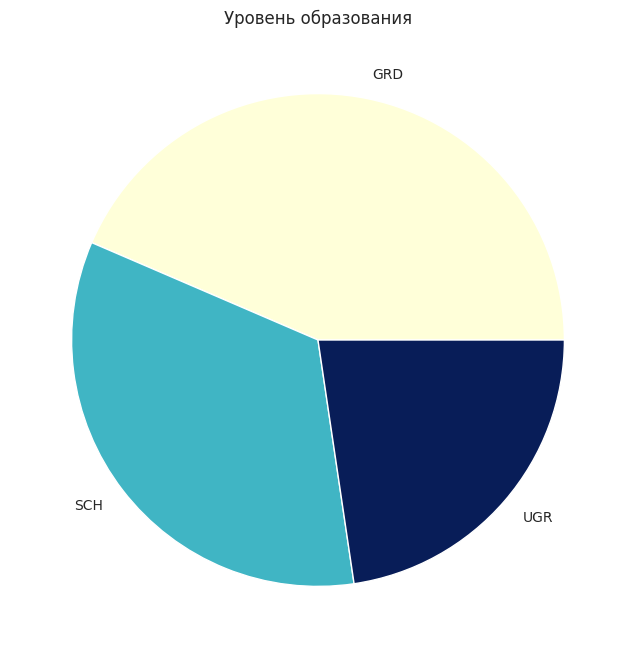

'\nSCH (52%) - School;\nGRD (31%) - Graduated (Master degree);\nUGR (13%) - UnderGraduated (Bachelor degree);\nPGR (1.7%) - PostGraduated;\nACD (0.3%) - Academic Degree.\n'

In [119]:
# Статистика по образованию

df_edited = main_data.groupby('education_level').size()

df_edited.plot(kind='pie', subplots=True, figsize=(8, 8), cmap = 'YlGnBu')
plt.title("Уровень образования")
plt.xticks(rotation=90)
plt.ylabel("")
plt.show()

'''
SCH (52%) - School;
GRD (31%) - Graduated (Master degree);
UGR (13%) - UnderGraduated (Bachelor degree);
PGR (1.7%) - PostGraduated;
ACD (0.3%) - Academic Degree.
'''

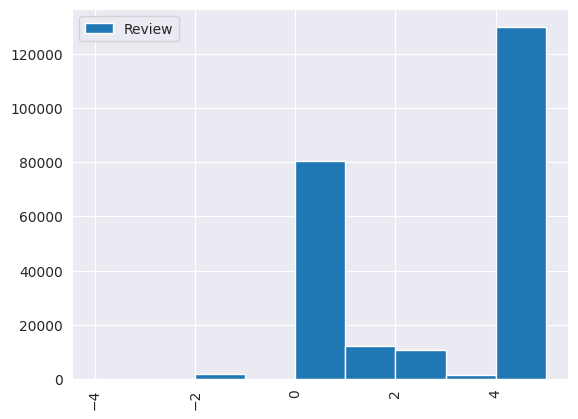

In [120]:
# Статистика по оценкам
main_data.review_score_desc.hist(bins = 9, label='Review')
plt.xticks(rotation = 90)
plt.legend()
plt.show()

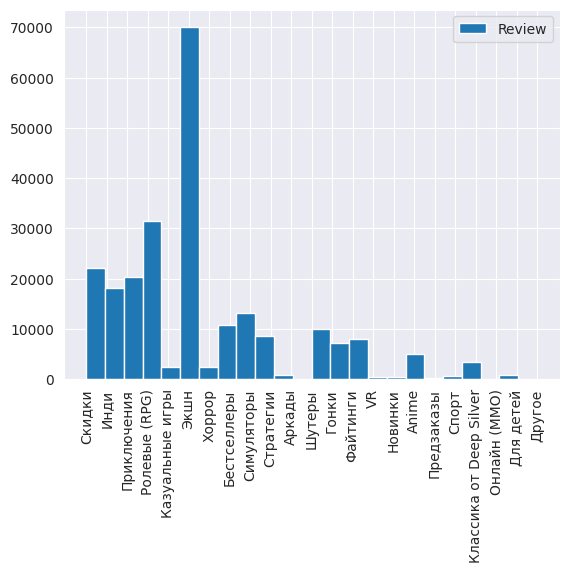

In [121]:
main_data.category_name.hist(bins =  24, label='Review')
plt.xticks(rotation = 90)
plt.legend()
plt.show()

# Преобразование данных

In [122]:
#OneHotEncoding столбцов

In [123]:
main_data.drop('steam_name', axis = 1,inplace=True)

<ipython-input-123-48d30f400733>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_data.drop('steam_name', axis = 1,inplace=True)


In [124]:
df = pd.get_dummies(main_data, columns=['order_day','category_name', 'gender_cd', 'has_dlc', "city_nm",'type', 'is_coming_soon', "release_date"], dtype=float,drop_first = True )


In [125]:
df.head()

,good_price,age,education_level,appid,pos_reviews,neg_reviews,total_reviews,review_score_desc,order_day_2023,category_name_VR,...,release_date_2016,release_date_2017,release_date_2018,release_date_2019,release_date_2020,release_date_2021,release_date_2022,release_date_2023,release_date_2024,release_date_nan
0,299.00,28.0,UGR,230820.0,840.0,122.0,962.0,4,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,33.49,35.0,UGR,230820.0,840.0,122.0,962.0,4,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,29.90,25.0,GRD,230820.0,840.0,122.0,962.0,4,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,29.90,34.0,GRD,230820.0,840.0,122.0,962.0,4,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,29.90,25.0,UGR,230820.0,840.0,122.0,962.0,4,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [126]:
df.shape
main_data = df
del df

### Pair Plot

In [127]:
if 0:
  import seaborn as sns
  sns.pairplot(main_data, hue="education_level", diag_kind="kde")

New HEATMAP

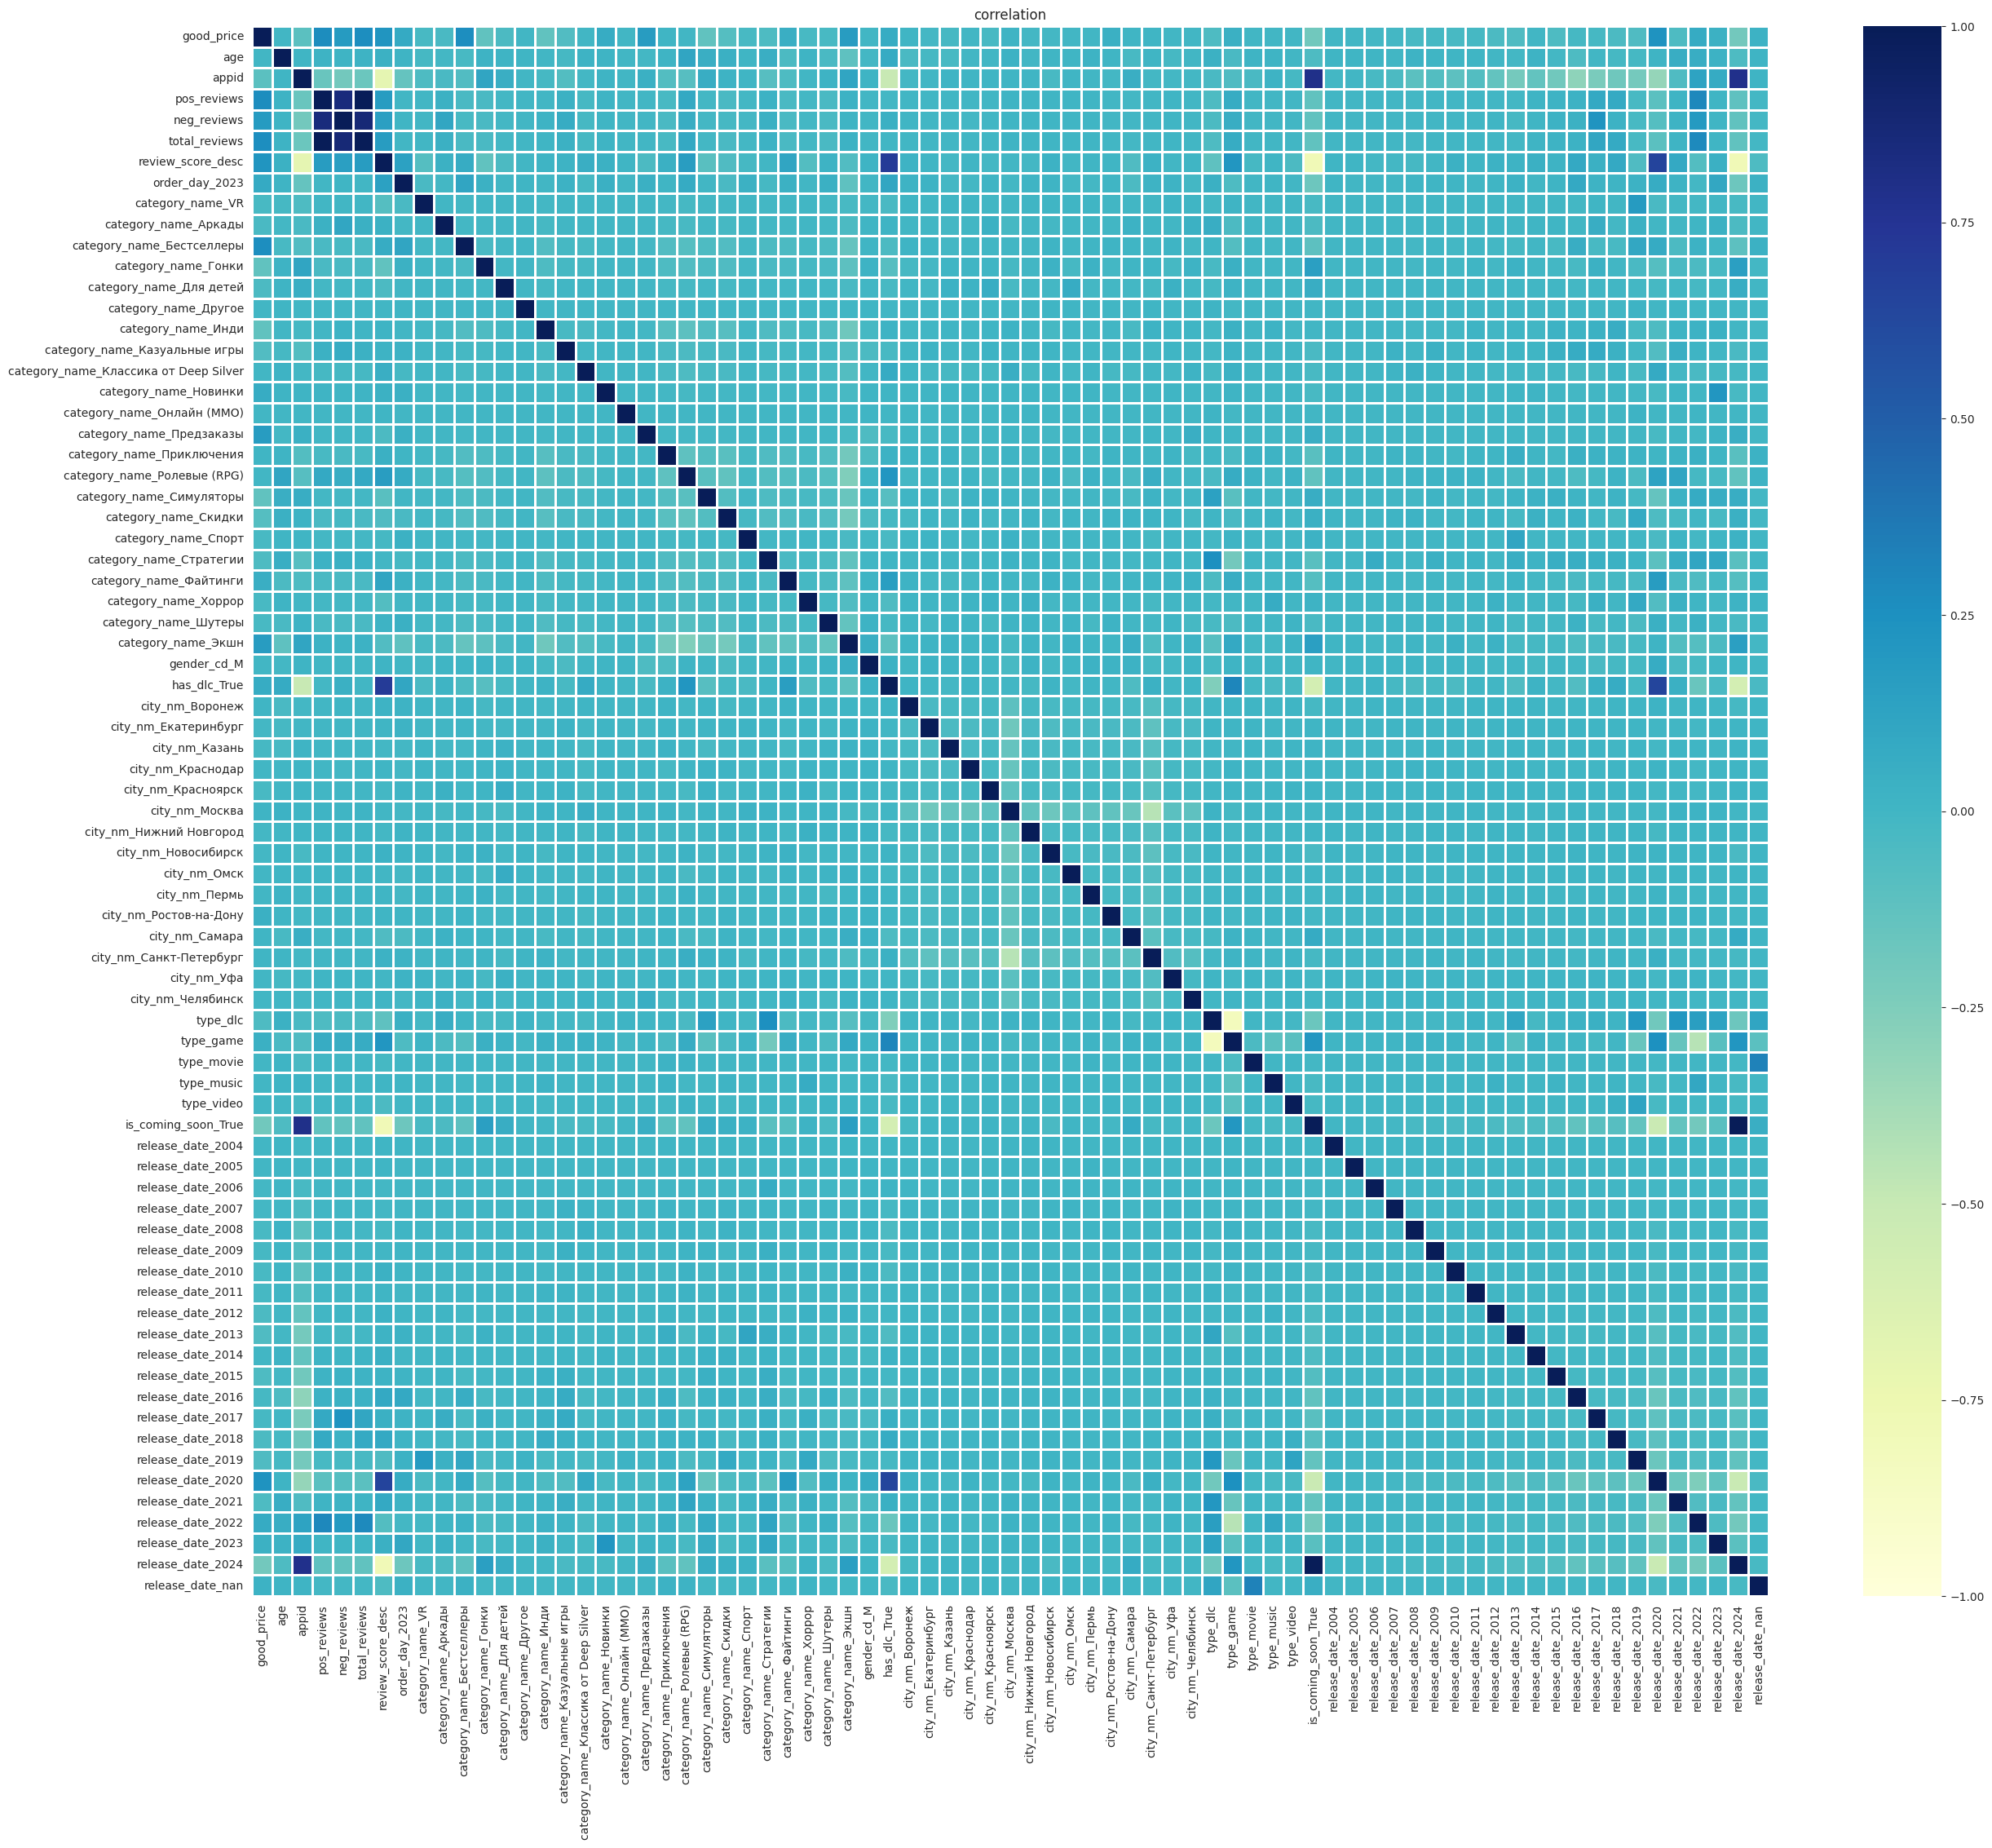

In [128]:
if 1:
  numeric_main_data = main_data.select_dtypes(include=['float64', 'int64'])
  corr = numeric_main_data.corr()
  plt.figure(figsize=(30, 25))
  colors = ["#000080", "#0000FF", "#191970", "#81D8D0", "#1034A6", "#0F52BA", "#000F89", "#40E0D0", "#26619C", "#89CFF0", "#007BA7", "#1CA9C9", "#120A8F", "#ADD8E6", "#007FFF", "#00BFFF", "##4169E1"]
  sns.heatmap(corr, annot=False, cmap='YlGnBu', linewidths=2, vmin=-1)
  plt.title('correlation')
  plt.show()


# Models

In [129]:
main_data.shape

(236622, 76)

Train-test-split

In [130]:
from sklearn.model_selection import train_test_split

In [131]:
main_data

,good_price,age,education_level,appid,pos_reviews,neg_reviews,total_reviews,review_score_desc,order_day_2023,category_name_VR,...,release_date_2016,release_date_2017,release_date_2018,release_date_2019,release_date_2020,release_date_2021,release_date_2022,release_date_2023,release_date_2024,release_date_nan
0,299.00,28.0,UGR,230820.0,840.0,122.0,962.0,4,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,33.49,35.0,UGR,230820.0,840.0,122.0,962.0,4,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,29.90,25.0,GRD,230820.0,840.0,122.0,962.0,4,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,29.90,34.0,GRD,230820.0,840.0,122.0,962.0,4,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,29.90,25.0,UGR,230820.0,840.0,122.0,962.0,4,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247549,125.00,29.0,GRD,2192770.0,0.0,0.0,0.0,0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
247550,125.00,29.0,GRD,2192770.0,0.0,0.0,0.0,0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
247551,125.00,29.0,GRD,2192770.0,0.0,0.0,0.0,0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
247552,125.00,29.0,GRD,2192770.0,0.0,0.0,0.0,0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [132]:
main_data.dropna()

,good_price,age,education_level,appid,pos_reviews,neg_reviews,total_reviews,review_score_desc,order_day_2023,category_name_VR,...,release_date_2016,release_date_2017,release_date_2018,release_date_2019,release_date_2020,release_date_2021,release_date_2022,release_date_2023,release_date_2024,release_date_nan
0,299.00,28.0,UGR,230820.0,840.0,122.0,962.0,4,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,33.49,35.0,UGR,230820.0,840.0,122.0,962.0,4,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,29.90,25.0,GRD,230820.0,840.0,122.0,962.0,4,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,29.90,34.0,GRD,230820.0,840.0,122.0,962.0,4,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,29.90,25.0,UGR,230820.0,840.0,122.0,962.0,4,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247549,125.00,29.0,GRD,2192770.0,0.0,0.0,0.0,0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
247550,125.00,29.0,GRD,2192770.0,0.0,0.0,0.0,0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
247551,125.00,29.0,GRD,2192770.0,0.0,0.0,0.0,0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
247552,125.00,29.0,GRD,2192770.0,0.0,0.0,0.0,0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [133]:
X = main_data.drop(('education_level'), axis = 1)
y = main_data['education_level']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [134]:
X_train.shape

(158536, 75)

In [135]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 158536 entries, 93306 to 127829
Series name: education_level
Non-Null Count   Dtype 
--------------   ----- 
158536 non-null  object
dtypes: object(1)
memory usage: 2.4+ MB


Models

Повторить такой блок для каждой из возможных моделек

In [136]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor

In [137]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [138]:
y_pred = clf.predict(X_test)

In [139]:
from sklearn.metrics import f1_score, accuracy_score

In [140]:
accuracy_score(y_test, y_pred)

0.784506825807443

In [141]:
f1_score(y_test, y_pred, average='weighted')

0.7835708806415275

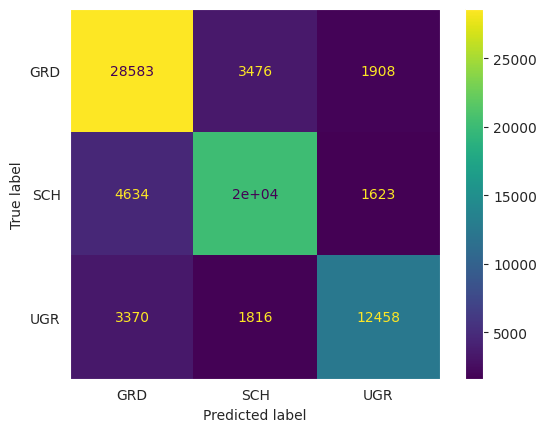

In [142]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.grid(False)
plt.show()

In [143]:
main_data['education_level'] = main_data.education_level.replace({'GRD': 0, 'SCH': 1, 'UGR': 2})
X = main_data.drop(('education_level'), axis = 1)
y = main_data['education_level']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [144]:
reg_tree = DecisionTreeRegressor(random_state=17)
reg_tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=17)

In [145]:
reg_tree_pred = list(map(int,list(reg_tree.predict(X_test))))

In [146]:
accuracy_score(y_test, reg_tree_pred)

0.7652844299874497

In [147]:
f1_score(y_test, reg_tree_pred, average='weighted')

0.7632861316186337

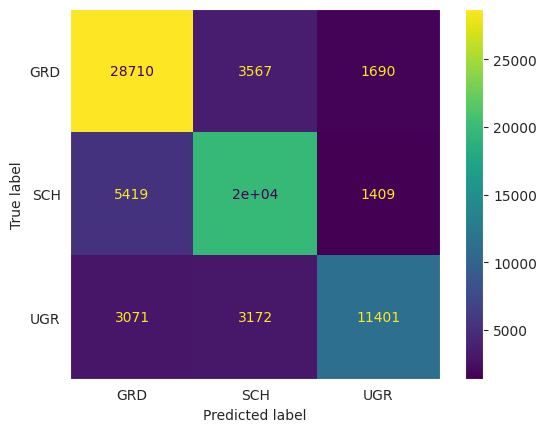

In [148]:
cm = confusion_matrix(y_test, reg_tree_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['GRD','SCH','UGR'])
disp.plot()
plt.grid(False)
plt.show()

In [149]:
LogClass = LogisticRegression()
LogClass.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [150]:
y_pred = LogClass.predict(X_test)

In [151]:
accuracy_score(y_test, y_pred)

0.4350715877365981

In [152]:
f1_score(y_test, y_pred, average='weighted')

0.26565702526417945

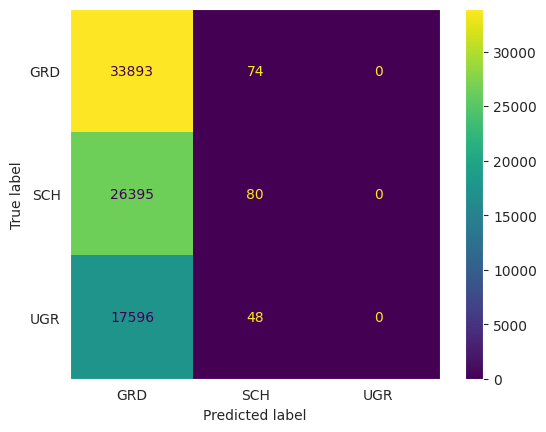

In [153]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= ['GRD','SCH','UGR'])
disp.plot()
plt.grid(False)
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=093973a1-2624-4149-8261-a901fba17f2f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>